Vocabulary Size: 64509
Top 20 Words: [('your', 20948), ('can', 16398), ('health', 11526), ('more', 6958), ('i', 5656), ('if', 5609), ('like', 5503), ('body', 5349), ('may', 5257), ('these', 5044), ('will', 4899), ('one', 4860), ('people', 4854), ('said', 4638), ('who', 4630), ('when', 4625), ('up', 4285), ('blood', 4257), ('all', 4221), ('help', 4213)]


C:\Users\kesar\AppData\Local\Temp\ipykernel_1680\106233104.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words], palette="viridis")


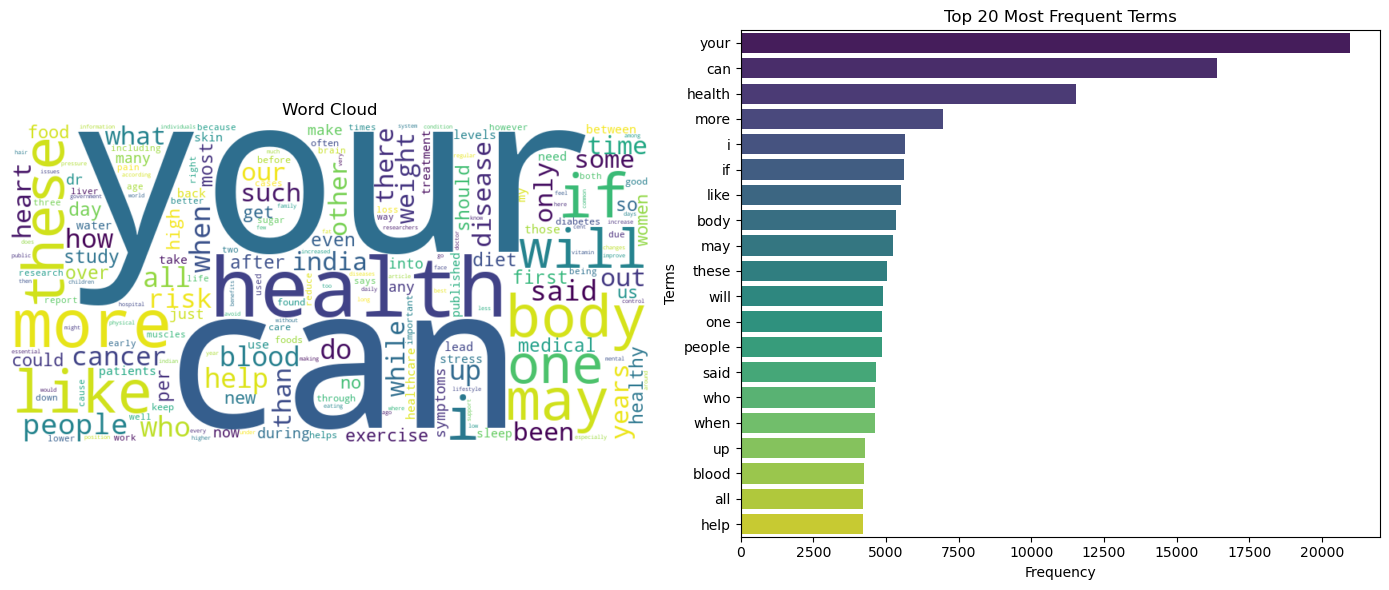

In [3]:
import pandas as pd
from collections import Counter
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Load your Excel file
df = pd.read_excel("indian_health_bias_combined_clean.xlsx")

# Combine all text
all_text = " ".join(df['text'].astype(str).tolist())

# Simple custom stopwords list
stopwords = set([
    'the', 'and', 'to', 'of', 'in', 'a', 'is', 'for', 'on', 'that', 'with',
    'as', 'by', 'are', 'was', 'at', 'be', 'this', 'an', 'from', 'or', 'it',
    'has', 'have', 'had', 'its', 'were', 'but', 'which', 'they', 'their',
    'also', 'not', 'he', 'she', 'we', 'you', 'his', 'her', 'them', 'about'
])

# Preprocess text
words = all_text.lower().translate(str.maketrans('', '', string.punctuation)).split()
filtered_words = [word for word in words if word not in stopwords and word.isalpha()]

# Vocabulary size
vocab_size = len(set(filtered_words))
print("Vocabulary Size:", vocab_size)

# Most frequent terms
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)
print("Top 20 Words:", common_words)

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")

plt.subplot(1, 2, 2)
sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words], palette="viridis")
plt.title("Top 20 Most Frequent Terms")
plt.xlabel("Frequency")
plt.ylabel("Terms")

plt.tight_layout()
plt.show()


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kesar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Load your dataset
df =  pd.read_excel("indian_health_bias_combined_clean.xlsx")

In [17]:
print(df.columns)


Index(['source', 'title', 'text', 'url'], dtype='object')


In [19]:
text_data = df['text'].dropna().astype(str).str.lower().str.cat(sep=' ')

Vocabulary Size: 64414
Top 20 Most Frequent Words:
health: 11526
also: 8539
like: 5503
body: 5349
may: 5257
one: 4860
people: 4854
said: 4638
blood: 4257
help: 4213
cancer: 4059
risk: 3985
time: 3707
weight: 3614
india: 3531
disease: 3483
heart: 3393
years: 3336
study: 3269
even: 3221


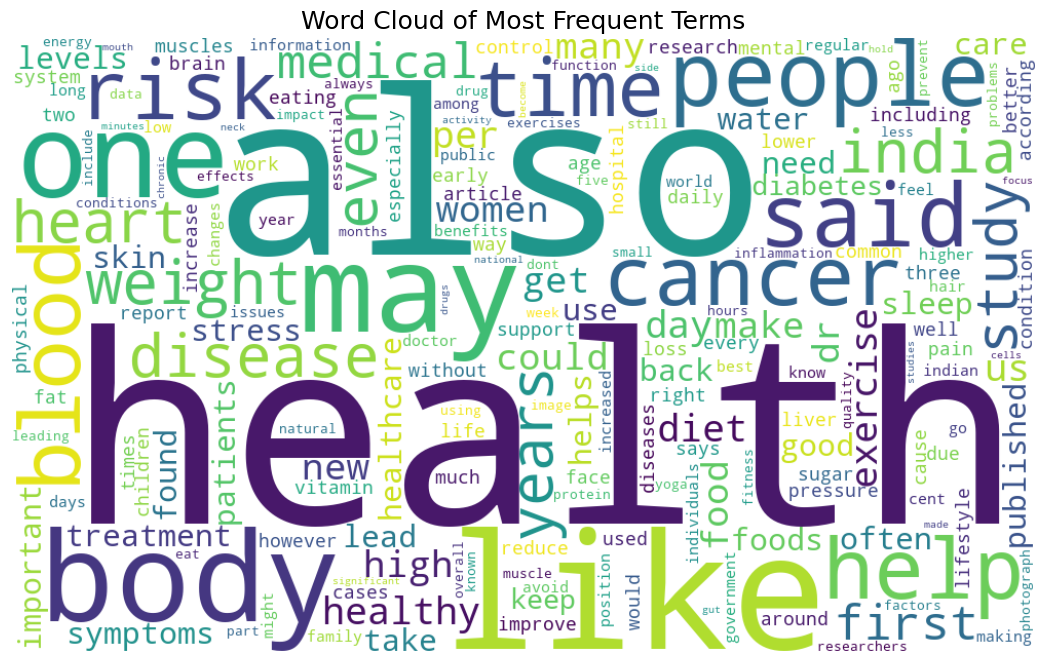

In [21]:
# Remove punctuation
text_data = text_data.translate(str.maketrans('', '', string.punctuation))

# Tokenize and remove stopwords + non-alphabetic tokens
tokens = [word for word in text_data.split() if word.isalpha() and word not in stop_words]

# Vocabulary size
vocab_size = len(set(tokens))
print(f"Vocabulary Size: {vocab_size}")

# Most common words
word_freq = Counter(tokens)
common_words = word_freq.most_common(20)
print("Top 20 Most Frequent Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

# Word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(word_freq)

# Plot word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Terms", fontsize=18)
plt.show()

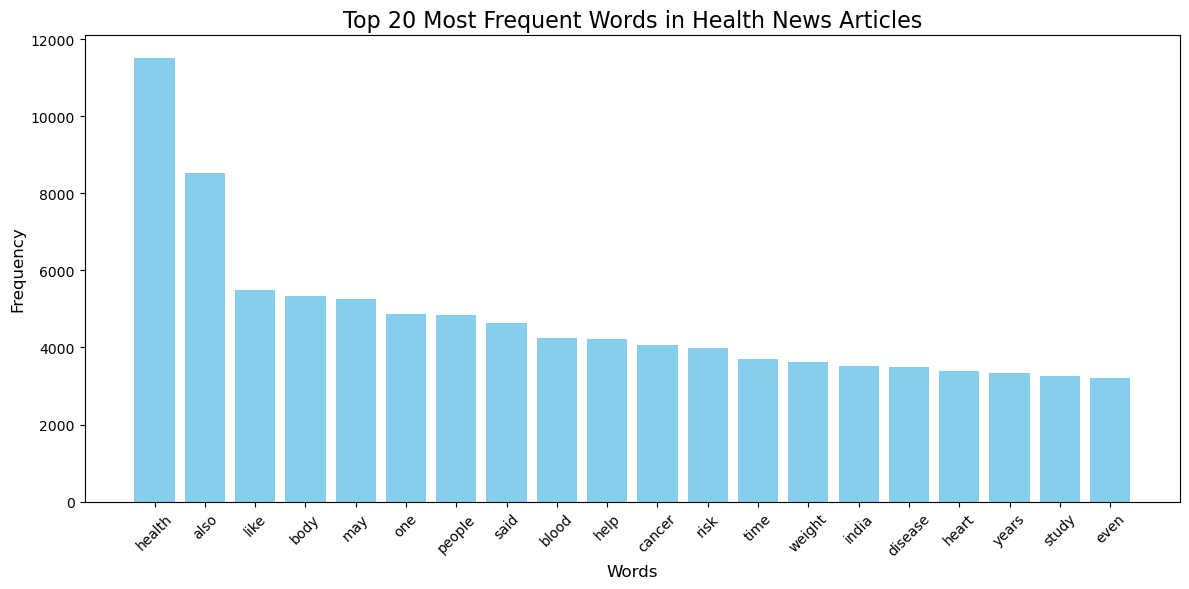

In [23]:
# Bar plot of the top 20 most frequent words
top_words, top_freqs = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(top_words, top_freqs, color='skyblue')
plt.title("Top 20 Most Frequent Words in Health News Articles", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


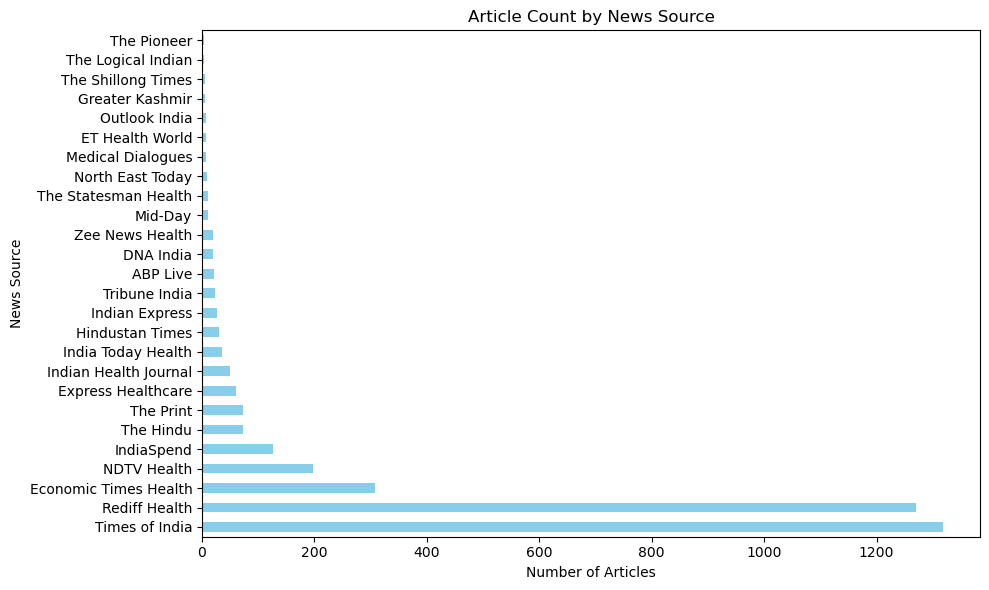

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
 
df['source'].value_counts().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Article Count by News Source")
plt.xlabel("Number of Articles")
plt.ylabel("News Source")
plt.tight_layout()
plt.show()

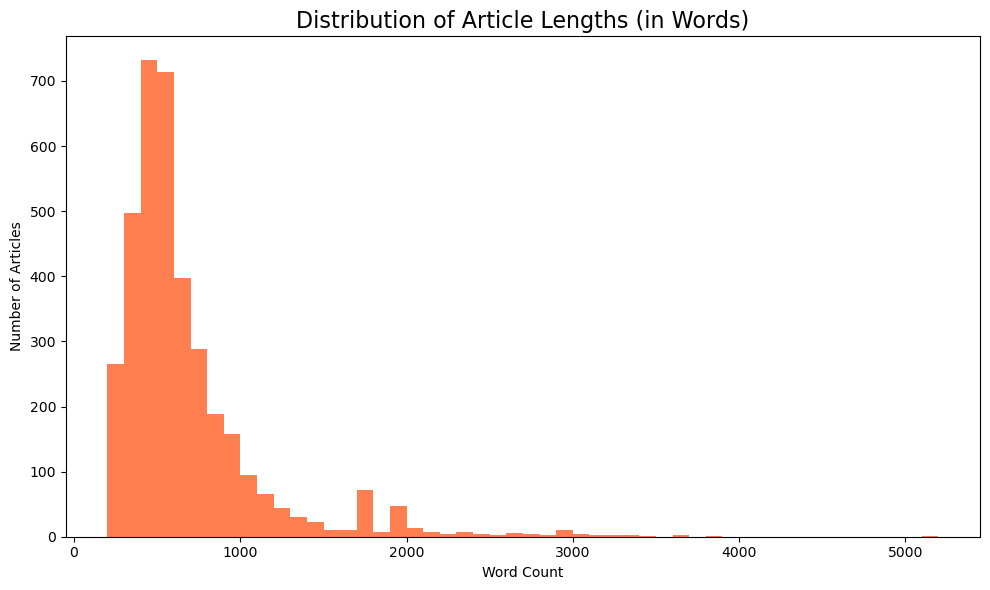

In [29]:
# Article length distribution (in words)
df['word_count'] = df['text'].dropna().apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=50, color='coral')
plt.title("Distribution of Article Lengths (in Words)", fontsize=16)
plt.xlabel("Word Count")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()
